In [56]:
# Covid19 Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [57]:
# Read csv file
df = pd.read_csv("Covid.csv")

In [58]:
df.head()

,Unnamed: 0,1,Patient Number,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,...,Source_2,Source_3,Backup Notes,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2.0,1.0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,...,https://weather.com/en-IN/india/news/news/2020...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3.0,2.0,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4.0,3.0,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5.0,4.0,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# Extraxt Gender , State and Age column from dataset
subset1 = df[["Gender","Detected State", "Age Bracket"]]
subset1

,Gender,Detected State,Age Bracket
0,NaN,NaN,NaN
1,F,Kerala,20
2,NaN,Kerala,NaN
3,NaN,Kerala,NaN
4,M,Delhi,45
...,...,...,...
8096,NaN,NaN,NaN
8097,NaN,NaN,NaN
8098,NaN,NaN,NaN
8099,NaN,NaN,NaN


In [60]:
# Age is of object type
subset1.info()
#Drop NA Value
subset1.dropna(subset = ["Detected State","Gender"],inplace = True)
subset1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 3 columns):
Gender            1911 non-null object
Detected State    7776 non-null object
Age Bracket       1170 non-null object
dtypes: object(3)
memory usage: 190.0+ KB


,Gender,Detected State,Age Bracket
1,F,Kerala,20
4,M,Delhi,45
5,M,Telangana,24
6,M,Rajasthan,69
21,F,Rajasthan,70
...,...,...,...
7680,M,Karnataka,43
7681,F,Karnataka,50
7682,M,Karnataka,27
7683,M,Karnataka,31


In [61]:
subset1.groupby("Detected State")

In [62]:
x= subset1[subset1["Gender"]=="M"]
x.head()


,Gender,Detected State,Age Bracket
4,M,Delhi,45
5,M,Telangana,24
6,M,Rajasthan,69
22,M,Uttar Pradesh,NaN
25,M,Uttar Pradesh,NaN


In [63]:
y=subset1[subset1["Gender"]=="F"]
y.head()

,Gender,Detected State,Age Bracket
1,F,Kerala,20
21,F,Rajasthan,70
23,F,Uttar Pradesh,NaN
24,F,Uttar Pradesh,45
37,F,Kerala,53


In [64]:
subset1["Age Bracket"].fillna('0',inplace=True)
def assign_age(a):
    if len(a)>3:
        a1,a2 = a.split('-')
        return str((int(a1)+int(a2))/2).split('.')[0]
    else:
        return a

In [65]:
subset1['Age Bracket'] = subset1["Age Bracket"].apply(assign_age)

In [66]:
# Changed Age column to int Datatype and replaced NA Value in Age
subset1["Age Bracket"] = subset1['Age Bracket'].astype(int)
subset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1911 entries, 1 to 7684
Data columns (total 3 columns):
Gender            1911 non-null object
Detected State    1911 non-null object
Age Bracket       1911 non-null int32
dtypes: int32(1), object(2)
memory usage: 52.3+ KB


In [67]:
age_mean = int(subset1[subset1["Age Bracket"]!=0]['Age Bracket'].mean())

In [68]:
subset1["Age Bracket"].replace(0,age_mean,inplace=True)

In [69]:
subset1.head()

,Gender,Detected State,Age Bracket
1,F,Kerala,20
4,M,Delhi,45
5,M,Telangana,24
6,M,Rajasthan,69
21,F,Rajasthan,70


Text(0.5, 1.0, 'Average age of Affected Males/Females in all states in india')

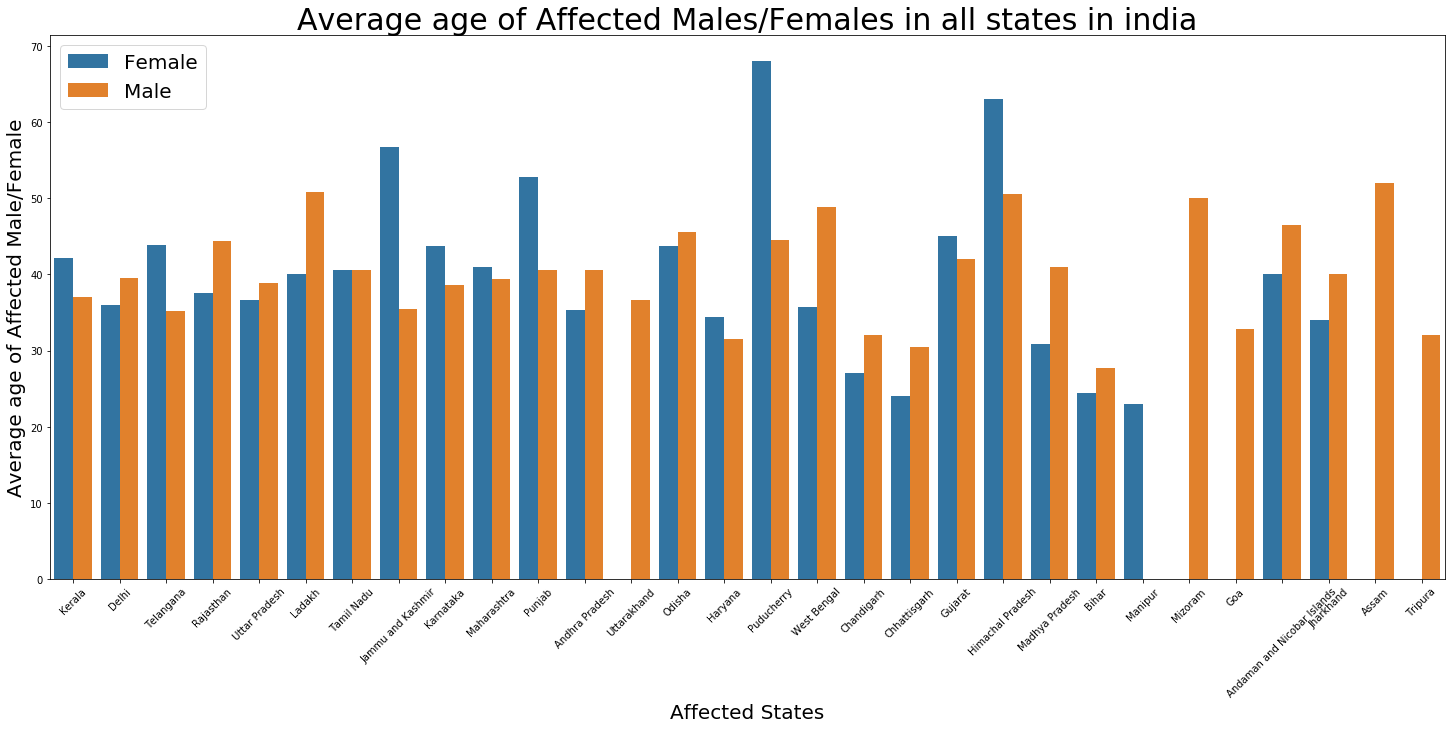

In [70]:
# Data Visualization
plt.figure(figsize=(25,10))
plt.xticks(rotation=45)
sns.barplot(x="Detected State", y= 'Age Bracket', data=subset1, hue='Gender',ci=None)
plt.legend(["Female","Male"],prop={'size':20})
plt.xlabel("Affected States",fontdict={"size":20})
plt.ylabel("Average age of Affected Male/Female",fontdict={"size":20})
plt.title("Average age of Affected Males/Females in all states in india", fontdict={"size":30})

In [ ]:
# Visualization Explaination
# The above Barplot shows the average age of the affected males amd females of each state of India.

In [ ]:
# In most of the states males affected are elder than female but in Kerela, Telangana, Karnataka, Punjab and Puduchery
# we can say mostly effected females are of around 44 Years and males are of around 38 years.
# So we can say that in these states affected males are younger comparatively.